In [2]:
import requests
import json
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [3]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CXUENTRTAINLB0901M',
                                'CXUENTRTAINLB0903M',
                                'CXUENTRTAINLB0904M',
                                'CXUENTRTAINLB0905M',
                                'CXUENTEROTHLB0901M',
                                'CXUENTEROTHLB0903M',
                                'CXUENTEROTHLB0904M',
                                'CXUENTEROTHLB0905M',
                                'CXUFEESADMLB0901M',
                                'CXUFEESADMLB0903M',
                                'CXUFEESADMLB0904M',
                                'CXUFEESADMLB0905M',
                                'CXUPETSLB0901M',
                                'CXUPETSLB0903M',
                                'CXUPETSLB0904M',
                                'CXUPETSLB0905M',
                                'CXUTOYSLB0901M',
                                'CXUTOYSLB0903M',
                                'CXUTOYSLB0904M',
                                'CXUTOYSLB0905M',
                                'CXUTVAUDIOLB0901M',
                                'CXUTVAUDIOLB0903M',
                                'CXUTVAUDIOLB0904M',
                                'CXUTVAUDIOLB0905M',
                                'CXUTOTALEXPLB0901M',
                                'CXUTOTALEXPLB0903M',
                                'CXUTOTALEXPLB0904M',
                                'CXUTOTALEXPLB0905M'
                               ],
                   "startyear":"2017", 
                   "endyear":"2017",
                   "catalog":True, 
                   "calculations":True, 
                   "annualaverage":True,
            "registrationkey":"a3f26c081d1546a58b1461108c6f62f9"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)

json_data = json.loads(p.text)

pp.PrettyPrinter(indent=2)
output = open("CXENTERTAIN" + '.json','w')
pp.pprint(json_data, stream=output)
output.close()


In [4]:
list1 = []
tlist1 = []
tlist2 = []


if json_data['status'] == "REQUEST_SUCCEEDED":
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
#         print(series['catalog']['item'])
        series_title = series['catalog']['series_title']
        titleList = series_title.split('by Race:', 1)
        tlist1.append(titleList[0])
        tlist2.append(titleList[1])
        #print(series_title)
        for item in series['data']:
            
            year = item['year']
            period = item['period']
            value = int(item['value'])
            list1.append(value)
            dict1 = {''}
        #print("Year:" + year + " Value:" + value)

else:
    print(json_data['status'])


    

In [5]:
df = pd.DataFrame(np.column_stack([list1, tlist1, tlist2]), 
                               columns=['value', 'Category', 'Race'])
df.value = pd.to_numeric(df.value, errors='coerce')



In [6]:

lf = df.pivot(index='Race', columns='Category', values='value')

lf
#must rename indices/cols

#rename indices

lf.index
lf = lf.rename(index={' Race of ref. person: Black or African American': 'Black or African American', ' Race of reference person: Asian(from 2003)': 'Asian', ' Race of rf. pers.: White and All Others(from 2003)': 'White and All Others'})
lf.columns
lf['Entertainment as Percent of Total'] = (lf['Entertainment ']/lf['Total average annual expenditures '])*100
#lf['Entertainment as Percent of Total'] = lf['Entertainment as Percent of Total'].map('{:,.2f}%'.format)
lf
#totalfaresdf['Total Fare'].map('${:,.2f}'.format)

Category,Audio and visual equipment and services,Entertainment,Entertainment: fees and admissions,"Entertainment: other supplies, equip., & services",Pets,Total average annual expenditures,"Toys, hobbies, and playground equipment",Entertainment as Percent of Total
Race,,,,,,,,
All Consumer Units,985,3203,750,599,710,60060,159,5.333000
Black or African American,848,1643,313,145,226,43117,111,3.810562
Asian,772,2797,1400,232,265,72850,128,3.839396
White and All Others,1021,3475,782,693,811,62032,168,5.601947


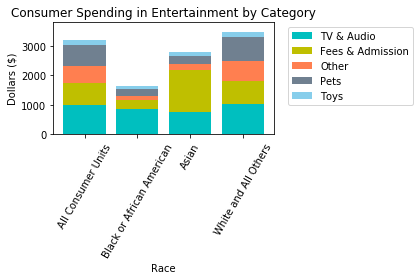

In [59]:
#Could make pie charts for each race and the percent of entertainment spending by category
xlabels = lf.index
xl = np.arange(len(xlabels))


audio = lf['Audio and visual equipment and services ']
fees = lf['Entertainment: fees and admissions ']
other = lf['Entertainment: other supplies, equip., & services ']
pets = lf['Pets ']
toys = lf['Toys, hobbies, and playground equipment ']
percent = lf['Entertainment as Percent of Total']

p1 = plt.bar(xlabels, audio, align='center', color ='c', label='TV & Audio')
p2 = plt.bar(xlabels, fees, align='center', color ='y', bottom=audio, label='Fees & Admission')
p3 = plt.bar(xlabels, other, align='center', color ='coral', bottom=[i+j for i,j in zip(audio, fees)], label='Other')
p4 = plt.bar(xlabels, pets, align='center', color ='slategrey', bottom=[i+j+k for i,j,k in zip(audio, fees, other)], label='Pets')
p5 = plt.bar(xlabels, toys, align='center', color ='skyblue', bottom=[i+j+k+l for i,j,k,l in zip(audio, fees, other, pets)],label='Toys')

#stack plots
plt.xticks(rotation=60)
plt.ylim(0,3800)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Consumer Spending in Entertainment by Category')
plt.xlabel('Race')
plt.ylabel('Dollars ($)')

plt.tight_layout()
plt.savefig('Dollars_spent_by_Race')

plt.show()

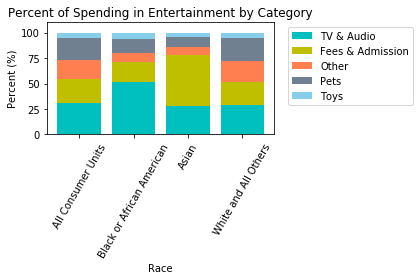

In [65]:
ldf = lf.copy()
ldf.head()
ldf.columns
ldf['Audio and visual equipment and services '] = (ldf['Audio and visual equipment and services ']/ldf['Entertainment '])*100
ldf['Entertainment: fees and admissions '] = (ldf['Entertainment: fees and admissions ']/ldf['Entertainment '])*100
ldf['Entertainment: other supplies, equip., & services '] = (ldf['Entertainment: other supplies, equip., & services ']/ldf['Entertainment '])*100
ldf['Pets '] = (ldf['Pets ']/ldf['Entertainment '])*100
ldf['Toys, hobbies, and playground equipment '] = (ldf['Toys, hobbies, and playground equipment ']/ldf['Entertainment '])*100

xplabels = ldf.index
xpl = np.arange(len(xplabels))

audiop = ldf['Audio and visual equipment and services ']
feesp = ldf['Entertainment: fees and admissions ']
otherp = ldf['Entertainment: other supplies, equip., & services ']
petsp = ldf['Pets ']
toysp = ldf['Toys, hobbies, and playground equipment ']


percent1 = plt.bar(xplabels, audiop, align='center', color ='c', label='TV & Audio')
percent2 = plt.bar(xplabels, feesp, align='center', color ='y', bottom=audiop, label='Fees & Admission')
percent3 = plt.bar(xplabels, otherp, align='center', color ='coral', bottom=[i+j for i,j in zip(audiop, feesp)], label='Other')
percent4 = plt.bar(xplabels, petsp, align='center', color ='slategrey', bottom=[i+j+k for i,j,k in zip(audiop, feesp, otherp)], label='Pets')
percent5 = plt.bar(xplabels, toysp, align='center', color ='skyblue', bottom=[i+j+k+l for i,j,k,l in zip(audiop, feesp, otherp, petsp)],label='Toys')

#stack plots
plt.xticks(rotation=60)
plt.ylim(0, 110)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Percent of Spending in Entertainment by Category')
plt.xlabel('Race')
plt.ylabel('Percent (%)')

plt.tight_layout()
plt.savefig('Percentage_Spent_by_Race')
plt.show()

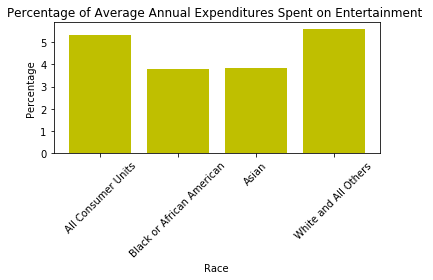

In [54]:

percentGraph = plt.bar(xlabels, percent, align='center', color ='y', label='Percent' )
plt.title('Percentage of Average Annual Expenditures Spent on Entertainment ')
plt.ylim(0,5.9)
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('Race_Percentage_of_Annual_Expenditure')
plt.show()

In [10]:
#scatter plot $ value vs percentage
cdf = lf.copy()
cdf.head()
cdf.columns

cdf['Audio and visual equipment and services '] = (cdf['Audio and visual equipment and services ']/cdf['Total average annual expenditures '])*100
cdf['Entertainment '] = (cdf['Entertainment ']/cdf['Total average annual expenditures '])*100
cdf['Entertainment: fees and admissions '] = (cdf['Entertainment: fees and admissions ']/cdf['Total average annual expenditures '])*100
cdf['Toys, hobbies, and playground equipment '] = (cdf['Toys, hobbies, and playground equipment ']/cdf['Total average annual expenditures '])*100
cdf['Pets '] = (cdf['Pets ']/cdf['Total average annual expenditures '])*100
cdf['Entertainment: other supplies, equip., & services '] = (cdf['Entertainment: other supplies, equip., & services ']/cdf['Total average annual expenditures '])*100
cdf

Category,Audio and visual equipment and services,Entertainment,Entertainment: fees and admissions,"Entertainment: other supplies, equip., & services",Pets,Total average annual expenditures,"Toys, hobbies, and playground equipment",Entertainment as Percent of Total
Race,,,,,,,,
All Consumer Units,1.640027,5.333000,1.248751,0.997336,1.182151,60060,0.264735,5.333000
Black or African American,1.966742,3.810562,0.725932,0.336294,0.524155,43117,0.257439,3.810562
Asian,1.059712,3.839396,1.921757,0.318463,0.363761,72850,0.175704,3.839396
White and All Others,1.645925,5.601947,1.260640,1.117165,1.307390,62032,0.270828,5.601947
